<a href="https://colab.research.google.com/github/GhaziBenHenia/Airline-Passenger-Forecasting-with-LSTM/blob/main/Airline_Passenger_Forecasting_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Business & Data Understaning**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/DATA

/content/drive/MyDrive/DATA


In [9]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DATA/airline-passengers.csv")
df.head(20)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [10]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


This dataset include history of 12 years from **1949-01** to **1960-12**

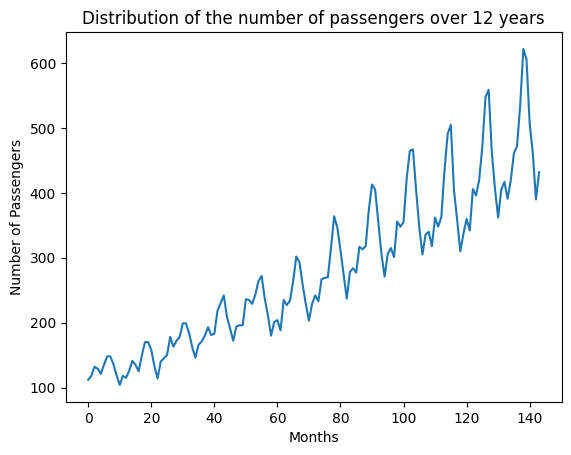

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.title('Distribution of the number of passengers over 12 years')
plt.plot(df['Passengers'])
plt.show()

## **Data Preparation**

In [13]:
def load_data(data, seq_len):
  X = []
  y = []
  for i in range(seq_len, len(data)):
    X.append(data.iloc[i-seq_len : i, 1])
    y.append(data.iloc[i,1])
  return X,y

In [14]:
X,y=load_data(df,20)

In [15]:
X_train=X[:100]
y_train=y[:100]
X_test=X[100:]
y_test=y[100:]

In [16]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [17]:
X_train

array([[112, 118, 132, ..., 149, 170, 170],
       [118, 132, 129, ..., 170, 170, 158],
       [132, 129, 121, ..., 170, 158, 133],
       ...,
       [301, 356, 348, ..., 491, 505, 404],
       [356, 348, 355, ..., 505, 404, 359],
       [348, 355, 422, ..., 404, 359, 310]])

In [18]:
print('x_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (100, 20)
y_train.shape =  (100,)
x_test.shape =  (24, 20)
y_test.shape =  (24,)


In [19]:
X_train = np.reshape(X_train, (100, 20, 1))
X_test = np.reshape(X_test, (24, 20, 1))

In [20]:
print('x_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (100, 20, 1)
y_train.shape =  (100,)
x_test.shape =  (24, 20, 1)
y_test.shape =  (24,)


## **LSTM from Keras**

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [22]:
model1Layer = Sequential()
model1Layer.add(LSTM(40, input_shape=(X_train.shape[1],X_train.shape[-1]),return_sequences=False,activation='relu'))
model1Layer.add(Dense(40))
model1Layer.add(Dense(1))

In [23]:
model1Layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40)                6720      
                                                                 
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 8401 (32.82 KB)
Trainable params: 8401 (32.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model2Layer = Sequential()
model2Layer.add(LSTM(40, input_shape=(X_train.shape[1],X_train.shape[-1]),return_sequences=True,activation='relu'))
model2Layer.add(LSTM(40, input_shape=(X_train.shape[1],X_train.shape[-1]),activation='relu'))
model2Layer.add(Dense(40))
model2Layer.add(Dense(1))

In [ ]:
model1Layer.compile(loss='mean_squared_error', optimizer='adam')
model1Layer.fit(X_train, y_train, epochs=500, batch_size=2, verbose=2)

In [ ]:
y_pred=model1Layer.predict(X_test)

1/1 [==============================] - 0s 221ms/step


In [ ]:
y_pred

array([[385.095  ],
       [371.4631 ],
       [359.12357],
       [423.7684 ],
       [418.82715],
       [414.93442],
       [501.64523],
       [596.29724],
       [576.1577 ],
       [438.1395 ],
       [397.81375],
       [389.017  ],
       [401.1069 ],
       [429.2988 ],
       [406.5175 ],
       [430.5662 ],
       [478.66376],
       [455.41226],
       [537.4487 ],
       [661.5563 ],
       [557.0845 ],
       [470.07596],
       [452.53995],
       [426.61606]], dtype=float32)

In [ ]:
y_test

array([360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405, 417,
       391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432])

Text(0, 0.5, 'Passengers')

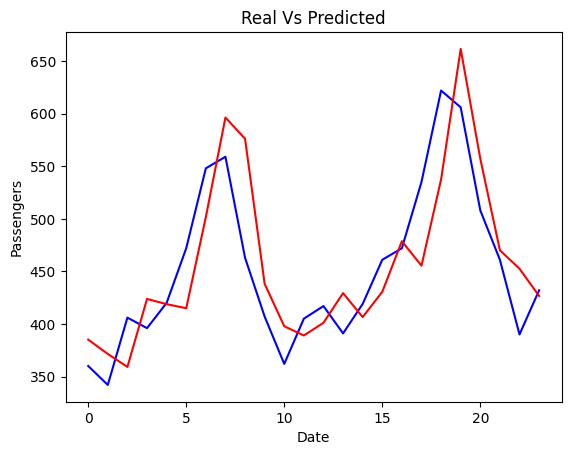

In [ ]:
plt.plot(y_test, color='blue',label='Real')
plt.plot(y_pred, color='red',label='Predicted')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
mae = np.round(np.mean(np.abs(y_test-y_pred))*100,2)
mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

In [ ]:
print("RMSE=",rmse)
print("MAE=",mae)
print("MAPE=",mape)

RMSE= 46.74
MAE= 8225.78
MAPE= 18.16
